In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carrega o conjunto de dados "msleep"
msleep = pd.read_csv("datasets/msleep.csv")
msleep.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


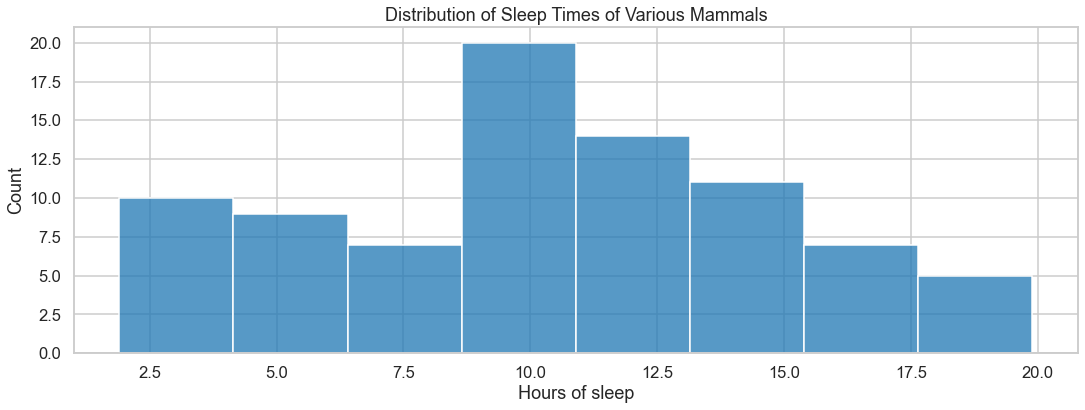

In [29]:
# Histograms
sns.set_style('whitegrid')
sns.set_context("talk")
plt.figure(figsize=(18,6))
g = sns.histplot(data=msleep,x='sleep_total')
g.set_title("Distribution of Sleep Times of Various Mammals")
g.set(xlabel='Hours of sleep')
plt.show()

## Measures of center

Where is the center of the data?
- Mean
- Median
- Mode

In [22]:
msleep_mean = np.mean(msleep['sleep_total'])
msleep_mean

10.433734939759034

In [23]:
msleep_median = np.median(msleep['sleep_total'])
msleep_median

10.1

In [25]:
import statistics

msleep_mode = statistics.mode(msleep['sleep_total'])
msleep_mode

12.5

In [26]:
msleep_mode2 = statistics.mode(msleep['vore'])
msleep_mode2

'herbi'

In [27]:
msleep[msleep['vore'] == 'insecti']

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
21,Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.116667,4.3,0.00030,0.023
42,Little brown bat,Myotis,insecti,Chiroptera,NaN,19.9,2.0,0.200000,4.1,0.00025,0.010
61,Giant armadillo,Priodontes,insecti,Cingulata,en,18.1,6.1,NaN,5.9,0.08100,60.000
66,Eastern american mole,Scalopus,insecti,Soricomorpha,lc,8.4,2.1,0.166667,15.6,0.00120,0.075
74,Short-nosed echidna,Tachyglossus,insecti,Monotremata,NaN,8.6,NaN,NaN,15.4,0.02500,4.500


In [28]:
msleep[msleep['vore'] == 'insecti']['sleep_total'].agg([np.mean,np.median])

mean      14.94
median    18.10
Name: sleep_total, dtype: float64

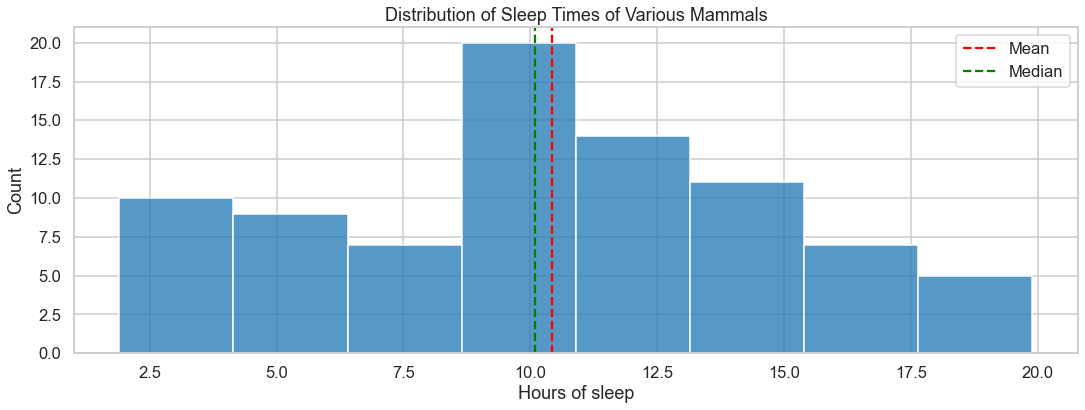

In [31]:
sns.set_style('whitegrid')
sns.set_context("talk")
plt.figure(figsize=(18,6))
g = sns.histplot(data=msleep,x='sleep_total')
g.set_title("Distribution of Sleep Times of Various Mammals")
g.set(xlabel='Hours of sleep')

plt.axvline(msleep_mean, color='r', linestyle='--', label='Mean')
plt.axvline(msleep_median, color='g', linestyle='--', label='Median')


# Adiciona a legenda
plt.legend()

plt.show()

## Measures of spread

**Variance:** Average distance from each data point to the data's mean

In [36]:
##Calculating variance

#1. subtract mean from each data point

dists = msleep['sleep_total'] - np.mean(msleep['sleep_total'])

#2. Square each distance
sq_dists = dists ** 2

#3. Sum squared distances

sum_sq_dists = np.sum(sq_dists)

#4. Divide by number of data points -1

variance = sum_sq_dists / (len(msleep) - 1 )
variance

19.805677343520422

In [37]:
np.var(msleep['sleep_total'], ddof=1)

19.805677343520422

Without `ddof=1`, ***population variance*** is calculated instead of ***sample variance***.

In [38]:
np.var(msleep['sleep_total'])

19.56705472492379

**Standard deviation (SD):** Standard deviation squares distances, penalizing longer distances more than shorter ones.

In [39]:
np.sqrt(np.var(msleep['sleep_total'], ddof=1))

4.4503569905705795

In [41]:
np.std(msleep['sleep_total'], ddof=1)

4.4503569905705795

**Mean absolute deviation(MAD):** Mean absolute deviation penalies each distance equally.

> One isn't better than the other, but SD is more common than MAD.

In [43]:
dists = msleep['sleep_total'] - np.mean(msleep['sleep_total'])
np.mean(np.abs(dists))

3.5667005370881117

**Quantiles:** Quantiles, also called percentiles, split up the data into some number of equal parts. 

In [44]:
np.quantile(msleep['sleep_total'],[0,0.25,0.5,0.75,1])

array([ 1.9 ,  7.85, 10.1 , 13.75, 19.9 ])

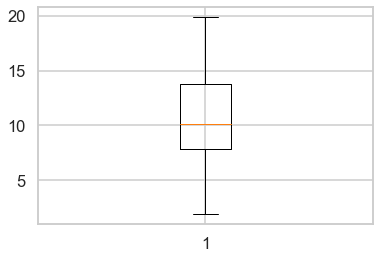

In [46]:
#Boxplots use quartiles

plt.boxplot(msleep['sleep_total'])
plt.show()

**Quantiles using np.linspace()**
> np.linspace(start,stop,num)

In [47]:
np.quantile(msleep["sleep_total"], np.linspace(0,1,5))

array([ 1.9 ,  7.85, 10.1 , 13.75, 19.9 ])

**Interquartile range (IQR):** Height of the box in a boxplot 
> Q3 - Q1

In [49]:
np.quantile(msleep['sleep_total'],0.75) - np.quantile(msleep['sleep_total'],0.25)

5.9

In [50]:
from scipy.stats import iqr
iqr(msleep['sleep_total'])

5.9

## Outilers

**Outiler:** data point that is substantially differente from the others. A data point is an outlier if:

- data < Q1 - 1.5 x IQR or
- data > Q3 + 1.5 x IQR

In [52]:
#Finding outliers

iqr = iqr(msleep['bodywt'])
lower_threshold = np.quantile(msleep['bodywt'],0.25) - 1.5 * iqr
upper_threshold = np.quantile(msleep['bodywt'],0.75) + 1.5 * iqr

msleep[(msleep['bodywt'] < lower_threshold) | (msleep['bodywt'] > upper_threshold)]

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.00,0.423,600.000
20,Asian elephant,Elephas,herbi,Proboscidea,en,3.9,NaN,NaN,20.10,4.603,2547.000
22,Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1.000000,21.10,0.655,521.000
23,Donkey,Equus,herbi,Perissodactyla,domesticated,3.1,0.4,NaN,20.90,0.419,187.000
29,Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NaN,22.10,NaN,899.995
30,Pilot whale,Globicephalus,carni,Cetacea,cd,2.7,0.1,NaN,21.35,NaN,800.000
35,African elephant,Loxodonta,herbi,Proboscidea,vu,3.3,NaN,NaN,20.70,5.712,6654.000
50,Tiger,Panthera,carni,Carnivora,en,15.8,NaN,NaN,8.20,NaN,162.564
52,Lion,Panthera,carni,Carnivora,vu,13.5,NaN,NaN,10.50,NaN,161.499
76,Brazilian tapir,Tapirus,herbi,Perissodactyla,vu,4.4,1.0,0.900000,19.60,0.169,207.501


In [53]:
#All in on go
msleep['bodywt'].describe()

count      83.000000
mean      166.136349
std       786.839732
min         0.005000
25%         0.174000
50%         1.670000
75%        41.750000
max      6654.000000
Name: bodywt, dtype: float64